# 1. Data Preparation:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("/content/heart_disease.xlsx")

In [3]:
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [4]:
df.head()

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 320.0+ bytes


In [6]:
df.describe()

,age,Age in years
count,12,12
unique,12,12
top,Gender,"Gender ; Male - 1, Female -0"
freq,1,1


# 2. Exploratory Data Analysis (EDA):

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
print(df.isnull().sum())

age             0
Age in years    0
dtype: int64


In [10]:
print(df.dtypes)

age             object
Age in years    object
dtype: object


In [15]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['age', 'Age in years'], dtype='object')


In [20]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['Age in years'] = pd.to_numeric(df['Age in years'], errors='coerce')


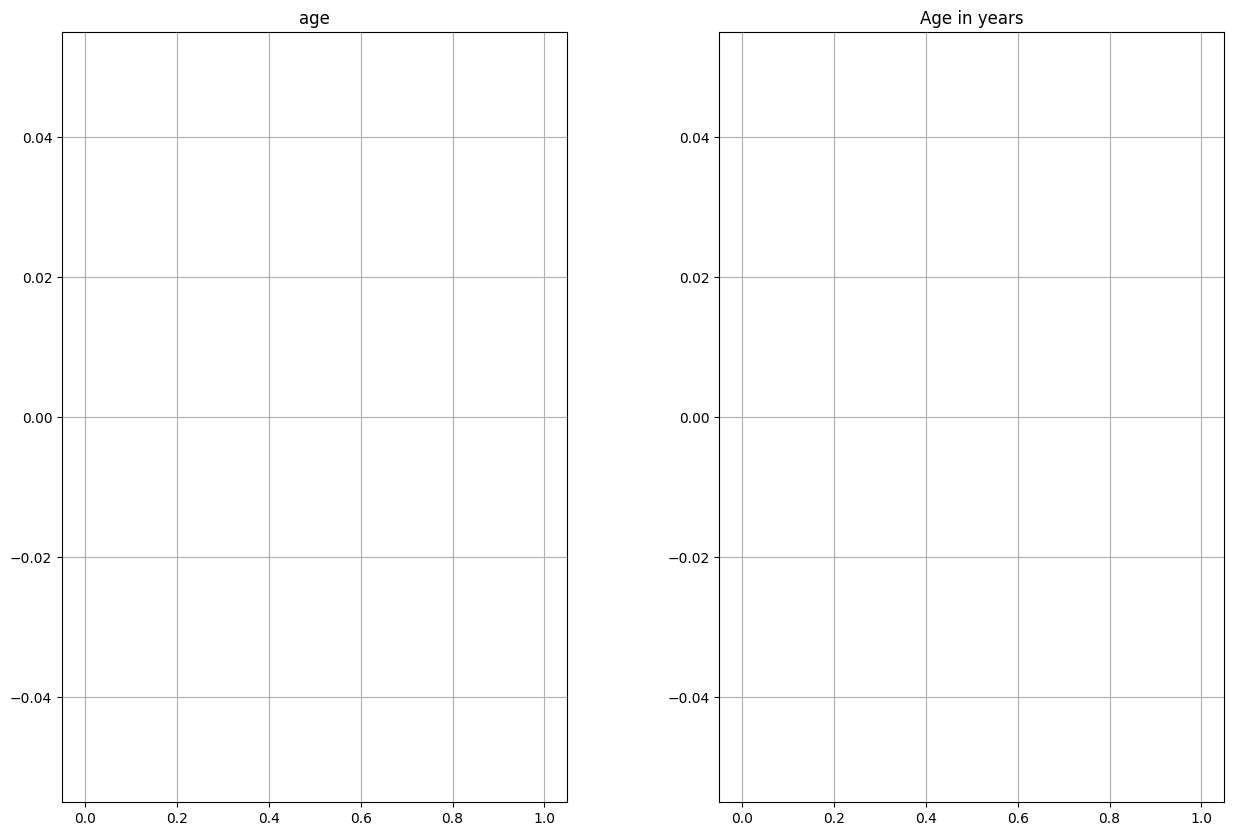

In [21]:
df.hist(bins=15, figsize=(15, 10))
plt.show()


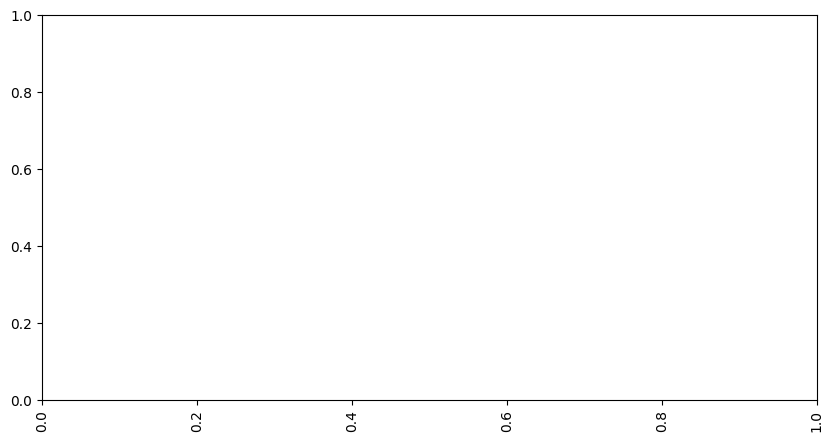

In [81]:
plt.figure(figsize=(10, 5))
sns.boxplot(df=df)
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


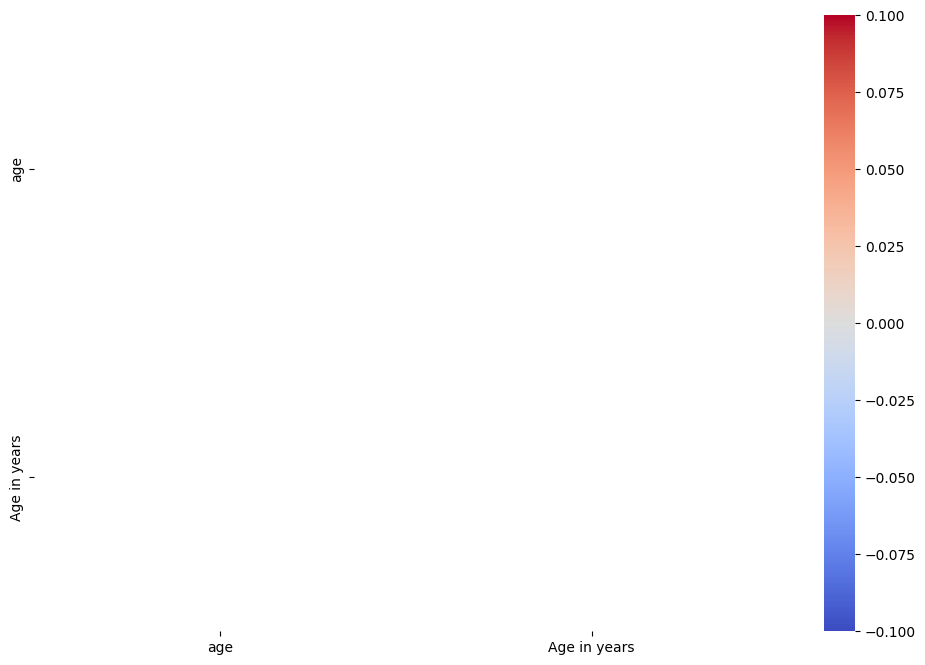

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Step 3: Feature Engineering

In [41]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder

In [42]:
df['age'] = LabelEncoder().fit_transform(df['age'])

In [43]:
scaler = StandardScaler()
numerical_features = ['age', 'Age in years']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [44]:
df.fillna(df.mean(), inplace=True)

# Step 4: Decision Tree Classification

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


In [64]:
X = df.drop('age', axis=1)
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [60]:
y_pred = dt_model.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# 5. Hyperparameter Tuning:

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [68]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [69]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [70]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Model Accuracy: 1.0


# 6. Model Evaluation and Analysis:

In [71]:
from sklearn.tree import plot_tree

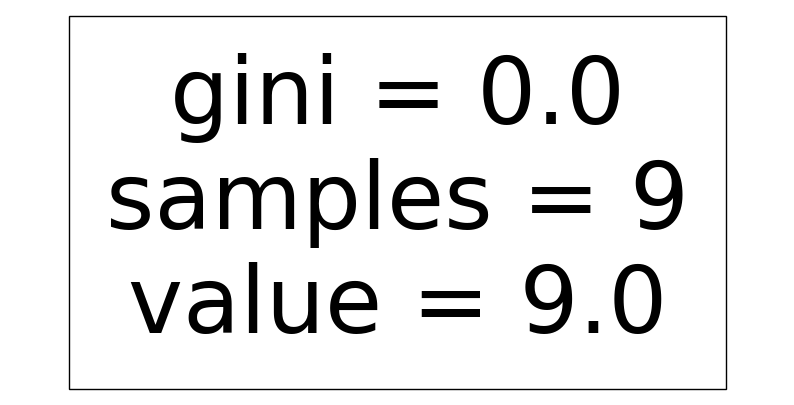

In [75]:
plt.figure(figsize=(10,5))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3', '4'])
plt.show()


In [74]:
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [77]:
print("Unique classes in y_test:", np.unique(y_test))

Unique classes in y_test: [0.]


In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0
